TAREA 1: CLASIFICACIÓN. MACHINE LEARNING MODELOS SUPERVISADOS

---------------------------------------------

Código Realizado por Javier Ramos y Francisco Diaz-Andreu

In [ ]:
!pip3 install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=cd8ec449f93dca5d298e6afa99944e629a86d06fb6307715aa3d93988c62661a
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=3687f3329e4d6c9111553baca11ddc734641ebaac8c03db884eb21e98f760864
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
#Antes de nada cargamos las librerias que tenemos que utilizar en este trabajo
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score



Nuestro dataset, por alguna razón tenía varias filas desplazadas una celda a la derecha, ademas de incluir en la columna id, unos mensajes de total amount..., que no se correspondían con los valores que deberían contener esas celdas. Para solucionar esto, quitamos estas filas del dataset y lo volvimos a subir.


In [ ]:
# Cargamos el dataset y vemos un poco por encima sus características
#df = pd.read_excel("pd_data_initial_preprocessing.xlsx")
#df.shape

#Como el dataset es muy grande para poder trabajar mejor hemos dividido el dataset en distintos grupos utilizando inicialmente el primero de ellos
#df2 = df.iloc[:200000, :]
#df2.shape

#df2.to_csv('df2.csv', index=False)
#from google.colab import files

#files.download('df2.csv')

In [ ]:
df2 = pd.read_excel("df2.xlsx")
df2.shape

(199997, 55)

In [ ]:
df2.head(10)

,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,112435993,https://lendingclub.com/browse/loanDetail.acti...,148xx,NaN,NaN,NaN,NaN,55.0,1.0,2315.0,...,2300.0,0.0,381.0,4.0,9.0,1985.0,NaN,NaN,NaN,NaN
1,112290210,https://lendingclub.com/browse/loanDetail.acti...,021xx,NaN,69.0,NaN,26.0,94.0,0.0,1962.0,...,16000.0,7.0,300.0,9.0,6.0,1992.0,NaN,NaN,NaN,NaN
2,112436985,https://lendingclub.com/browse/loanDetail.acti...,018xx,NaN,NaN,NaN,10.0,45.0,1.0,1950.0,...,6025.0,2.0,180.0,11.0,6.0,2002.0,NaN,NaN,NaN,NaN
3,112439006,https://lendingclub.com/browse/loanDetail.acti...,913xx,NaN,95.0,NaN,6.0,60.0,1.0,4240.0,...,20400.0,0.0,125.0,15.0,1.0,2007.0,NaN,NaN,NaN,NaN
4,112438929,https://lendingclub.com/browse/loanDetail.acti...,560xx,NaN,72.0,26.0,127.0,78.0,0.0,2996.0,...,13000.0,1.0,184.0,5.0,2.0,2002.0,NaN,NaN,NaN,NaN
5,112230200,https://lendingclub.com/browse/loanDetail.acti...,184xx,83.0,40.0,NaN,41.0,49.0,0.0,5227.0,...,12000.0,6.0,238.0,14.0,8.0,1997.0,NaN,NaN,NaN,NaN
6,112210041,https://lendingclub.com/browse/loanDetail.acti...,773xx,71.0,NaN,NaN,19.0,59.0,0.0,3990.0,...,6000.0,4.0,303.0,10.0,3.0,1992.0,NaN,NaN,NaN,NaN
7,112360031,https://lendingclub.com/browse/loanDetail.acti...,953xx,NaN,54.0,NaN,16.0,60.0,1.0,4107.0,...,12000.0,0.0,136.0,10.0,2.0,2006.0,NaN,NaN,NaN,NaN
8,112038251,https://lendingclub.com/browse/loanDetail.acti...,923xx,84.0,63.0,NaN,27.0,36.0,1.0,1581.0,...,11575.0,2.0,275.0,20.0,7.0,1994.0,NaN,NaN,NaN,NaN
9,112134207,https://lendingclub.com/browse/loanDetail.acti...,286xx,NaN,NaN,40.0,18.0,8.0,0.0,5133.0,...,20400.0,2.0,361.0,8.0,5.0,1987.0,NaN,NaN,NaN,NaN


1. Hacer un pequeño análisis descriptivo de los datos. Un análisis sencillo que incluya simplemente:
* Cantidad de valores nulos.
* Tipo de variables (cat, float, etc.)
* En la variable objetivo, distribución de sus valores.
* Matriz de correlación en variables continuas.


In [ ]:
df2.isnull().sum().sort_values(ascending=False)

Unnamed: 54                       199997
Unnamed: 53                       199997
Unnamed: 52                       199997
Unnamed: 51                       199997
mths_since_last_record            165835
mths_since_recent_bc_dlq          152177
mths_since_last_major_derog       145392
mths_since_recent_revol_delinq    130545
mths_since_last_delinq             97982
il_util                            26646
emp_title                          13837
emp_length                         13650
mo_sin_old_il_acct                  5475
mths_since_rcnt_il                  5463
dti                                  244
revol_util                           191
all_util                              23
addr_state                            12
fico_range_low                        12
fico_range_high                       12
initial_list_status                   12
total_acc                             12
purpose                               12
pub_rec                               12
application_type

In [ ]:
df2.dtypes

id                                  int64
url                                object
zip_code                           object
mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_title                          object
emp_length                        

Current               0.906538
Fully Paid            0.063530
Late (31-120 days)    0.013171
In Grace Period       0.007671
Charged Off           0.004615
Late (16-30 days)     0.004470
Default               0.000005
Name: loan_status, dtype: float64


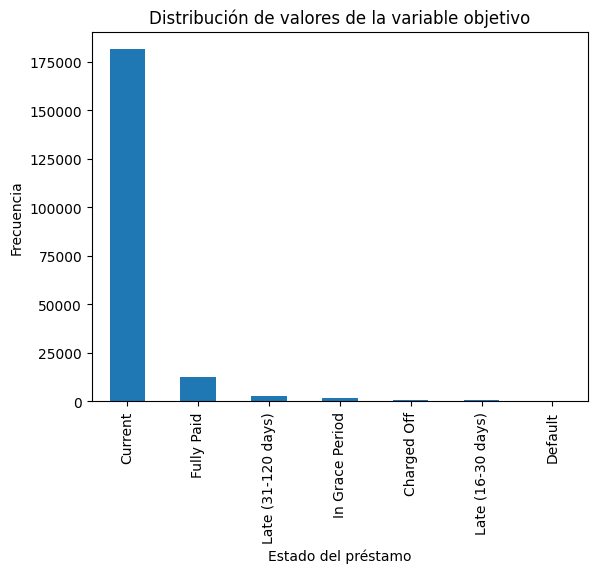

In [ ]:
value_counts = df2['loan_status'].value_counts(normalize=True)
print(value_counts)

df2['loan_status'].value_counts().plot(kind='bar')
plt.title('Distribución de valores de la variable objetivo')
plt.xlabel('Estado del préstamo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:

cor1 = df2.corr()
cor1.style.background_gradient(cmap='coolwarm')

<ipython-input-9-c48f7517f4e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor1 = df2.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,open_acc_6m,open_act_il,open_il_12m,total_bal_il,open_rv_12m,open_rv_24m,open_il_24m,inq_last_12m,mths_since_last_major_derog,mths_since_recent_revol_delinq,mths_since_last_delinq,emp_length,mo_sin_old_il_acct,revol_util,dti,annual_inc,sub_grade,term,int_rate,installment,total_acc,fico_range_low,fico_range_high,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
id,1.000000,0.132380,-0.004572,0.007891,-0.003385,-0.024051,0.011735,-0.017206,-0.004615,0.013381,-0.003427,0.014100,-0.006376,-0.023791,-0.017210,-0.006200,-0.008875,-0.004299,0.007625,0.003673,-0.028513,-0.012591,-0.028327,0.018381,-0.004303,0.040799,0.007035,0.000518,-0.016746,-0.025881,0.041466,0.041467,-0.073435,-0.017159,-0.012733,-0.019470,-0.013821,-0.024430,-0.000412,0.031092,nan,nan,nan,nan
mths_since_last_record,0.132380,1.000000,-0.038384,-0.099375,-0.030010,-0.016592,-0.044850,0.000636,0.004323,-0.051187,-0.002738,0.002959,-0.000901,-0.106855,-0.118991,0.017627,-0.065129,-0.023246,-0.117264,-0.070659,0.025659,-0.071302,0.030092,0.049018,-0.055677,0.013804,0.050883,-0.029218,-0.006032,-0.104316,0.224113,0.224113,-0.314170,0.289611,0.011581,-0.089945,-0.094880,0.023586,0.006285,0.100104,nan,nan,nan,nan
il_util,-0.004572,-0.038384,1.000000,0.062190,-0.274852,0.591779,0.150168,-0.112153,0.030472,0.161425,0.329316,0.327303,0.334026,0.067702,0.075888,0.298284,0.167797,-0.001291,0.060227,0.045111,-0.109965,0.003217,-0.054534,-0.015962,-0.050209,0.044014,0.013993,0.157486,-0.085928,0.116744,-0.128908,-0.128909,0.011665,0.015109,-0.096033,-0.044593,-0.111032,0.134142,0.019638,0.087692,nan,nan,nan,nan
mths_since_recent_bc_dlq,0.007891,-0.099375,0.062190,1.000000,-0.035428,0.049550,0.039561,-0.015698,0.004208,0.065679,-0.014462,0.058974,0.009152,0.089827,0.129970,0.073576,0.037904,0.551088,0.885995,0.757867,0.013163,0.009362,0.031252,0.017567,-0.018338,-0.000816,0.006601,0.001279,-0.006837,0.007660,0.035641,0.035641,0.058797,0.042810,-0.005639,-0.008805,0.039111,-0.015508,0.004630,-0.024280,nan,nan,nan,nan
mths_since_rcnt_il,-0.003385,-0.030010,-0.274852,-0.035428,1.000000,-0.117708,-0.212616,0.012430,-0.140301,-0.180885,-0.210202,-0.444859,-0.237460,-0.028880,-0.042056,-0.488688,-0.203149,-0.042790,-0.029898,-0.018782,-0.025099,0.062883,0.063924,-0.114657,-0.017535,-0.007074,-0.037747,-0.067100,-0.023187,-0.192204,-0.026978,-0.026974,-0.013573,-0.028985,-0.022935,-0.066809,0.030623,-0.154976,0.000724,-0.042703,nan,nan,nan,nan
all_util,-0.024051,-0.016592,0.591779,0.049550,-0.117708,1.000000,0.075565,0.126853,0.045161,-0.063428,0.373456,0.174246,0.289678,-0.147939,-0.163429,0.192597,0.023967,-0.011352,0.052869,0.026016,-0.066338,0.057179,0.653142,0.101551,0.003100,0.090713,0.056247,0.269785,0.027206,-0.007217,-0.427935,-0.427936,-0.016584,-0.023175,0.007588,-0.033996,-0.090994,-0.008789,0.020413,0.061209,nan,nan,nan,nan
inq_fi,0.011735,-0.044850,0.150168,0.039561,-0.212616,0.075565,1.000000,-0.077070,0.086352,0.154759,0.085183,0.286608,0.145173,0.095045,0.129869,0.363195,0.556396,-0.002122,0.035381,0.004994,0.004180,0.006960,-0.072726,0.046293,0.015410,0.037012,0.017239,0.157389,0.010209,0.162310,-0.079780,-0.079781,0.064679,0.071036,-0.005719,0.099844,-0.037788,0.104574,-0.000505,0.025557,nan,nan,nan,nan
max_bal_bc,-0.017206,0.000636,-0.112153,-0.015698,0.012430,0.126853,-0.077070,1.000000,-0.007148,-0.080206,0.025189,-0.039810,0.110776,-0.095906,-0.109271,-0.026148,-0.072298,0.046905,-0.004762,0.015065,0.061417,0.113590,0.314608,0.067185,0.087977,-0.009586,0.122726,-0.054886,0.360969,0.141318,0.055973,0.055966,-0.098752,-0.113076,0.387385,0.232636,0.230692,0.121837,-0.007133,-0.208799,nan,nan,nan,nan
total_cu_tl,-0.004615,0.004323,0.030472,0.004208,-0.140301,0.045161,0.086352,-0.007148,1.000000,0.081531,0.072892,0.188652,0.110781,0.

Gracias al análisis descriptivo realizado, observamos que existen una gran cantidad de valores nulos que es necesario tratar en cada caso para poder posteriormente trbaajar con los datos correctamente. 

Se observan también 3 catagorías de tipos de datos: int64, float 64 y object.
En cuanto a la distribución de los valores de la variable objetivo, la gran mayoría de ellos se encuentran al corriente de pago siendo la segunda categoría más utilizada aquellos que lo tienen todo totalmente pagado.

----------------------------------------

2. Tratar los valores missing tanto en las variables continuas como discretas de forma correcta. Recordad que si existen muchos valores missing no es adecuado eliminar dichas filas. Como guía, recordad que los valores missing: 
* En variables continuas se puede sustituir por  la media o mediana, o por un valor muy distinto al resto de cantidades, que refleje que de algún modo que es un valor missing.
* En variables discretas se pueden sustituir por la moda o una clase nueva que indique que no tienen valor, p.e. “SIN VALOR”.
* Puede ser interesante, estudiar y evaluar algunos de los métodos de la librería sklearn.impute, como por ejemplo sklearn.impute.KNNimpute, que realiza una imputación mediante una regresión con KNN.

In [ ]:
df2 = df2.drop(['Unnamed: 54', 'Unnamed: 53', 'Unnamed: 52', 'Unnamed: 51'], axis=1)

In [ ]:
df2.isnull().sum().sort_values(ascending=False)

mths_since_last_record            165835
mths_since_recent_bc_dlq          152177
mths_since_last_major_derog       145392
mths_since_recent_revol_delinq    130545
mths_since_last_delinq             97982
il_util                            26646
emp_title                          13837
emp_length                         13650
mo_sin_old_il_acct                  5475
mths_since_rcnt_il                  5463
dti                                  244
revol_util                           191
all_util                              23
purpose                               12
addr_state                            12
loan_status                           12
installment                           12
total_acc                             12
initial_list_status                   12
fico_range_low                        12
fico_range_high                       12
term                                  12
application_type                      12
pub_rec                               12
pub_rec_bankrupt

Una vez eliminadas aquellas columnas que tenían todos los datos con valores na ya podemos empezar a tratar el resto de las variables. En primer lugar nos encargaremos de aquellas que indican la cantidad de meses que ha pasado desde alguna acción. Para estas variables un valor na indica que no se ha producido esa acción por lo tanto es equivalente a infinito. Hemos decidido darle unos valores mucho más alto que el resto para simular este infinito.

In [ ]:
df2.mths_since_last_record.unique()

array([ nan,  83.,  71.,  84.,  72.,  69.,  16.,  55.,  11.,  67.,  40.,
        81.,  37.,  91.,  97.,  47.,  63.,  80.,  62.,  39., 114., 104.,
        99.,  64.,  17., 103.,  30., 118.,  25.,  79.,  76.,  28., 110.,
        95.,  89.,  61.,  86.,  94.,  57.,  98., 109.,  74.,  27.,  75.,
        52.,  23.,  78.,  43.,  90., 100.,  44.,  56.,  59.,  82.,  92.,
        32., 116.,  70.,   3., 113.,  77.,  34.,  50., 115.,  60.,  85.,
        29.,  45.,  35., 105., 112., 107.,  42.,  73.,  65.,  46., 102.,
        87.,  88.,  68.,  21.,   5.,   6.,  26.,  66., 111.,  31., 108.,
        93.,  53.,  96.,  49.,  51., 106.,  36.,  12.,  10.,   9.,  19.,
        18.,  54.,  58.,  15.,  33.,  38.,  48.,  24.,  14.,   8.,   4.,
         7.,  41.,   1., 101.,  20.,  13., 117.,   2.,  22., 119.,   0.])

In [ ]:
df2['mths_since_last_record'] = df2['mths_since_last_record'].fillna(500)


In [ ]:
df2.mths_since_recent_bc_dlq.unique()

array([ nan,  26.,  40.,  48.,  38.,  54.,  49.,  16.,  14.,  62.,  84.,
        64.,   5.,  59.,  32.,   6.,  52.,  80.,  55.,  30.,  36.,  70.,
        47.,  81.,  45.,  56.,  27.,  74.,  28.,  58.,  33.,  78.,  13.,
        69.,  77.,  39.,  72.,  42.,  15.,  19.,  17.,  22.,  24.,  61.,
        34.,  31.,  18.,   7.,  60.,  43.,  66.,  79.,  35.,  51.,  68.,
        50.,  71.,  41.,  75.,  10.,  20.,  67.,  44.,  21.,  46.,  37.,
        73.,  11.,  25.,  29.,  23.,   8.,   9.,  53.,  76.,   1.,   0.,
         2.,  12.,  65., 104.,   4.,  57.,  86.,  95.,  93., 108.,   3.,
        63., 114., 107.,  83.,  91.,  97.,  85., 105.,  96., 103.,  82.,
        90.,  92., 101., 146., 117., 102.,  99., 100.,  89., 136.,  88.,
        94.,  87., 121.,  98., 137., 116., 111., 130., 119., 161., 118.,
       112., 145., 115., 110., 129., 113., 109., 126., 106., 120., 158.,
       157., 134., 125., 128., 123., 127., 140., 131., 124., 132., 135.])

In [ ]:
df2['mths_since_recent_bc_dlq'] = df2['mths_since_recent_bc_dlq'].fillna(500)


In [ ]:
df2.mths_since_last_major_derog.unique()

array([ nan,  16.,  24.,  72.,  51.,  13.,  37.,  50.,  26.,  49.,   5.,
        33.,  60.,  65.,  63.,  59.,  66.,  32.,  70.,   9.,  36.,  56.,
        27.,  74.,  28.,  67.,  55.,  41.,  52.,  31.,  73.,   1.,  77.,
        47.,  46.,  39.,  54.,  48.,  29.,  82.,  14.,  64.,  30.,   7.,
        22.,  35.,  62.,  43.,  21.,  10.,  71.,  53.,  75.,  40.,  61.,
        79.,  42.,  68.,  44.,   0.,  45.,   3.,  17.,  19.,  15.,   8.,
        80.,  76.,  57.,  84.,  92.,  20.,  25.,  23.,  85.,  58.,  11.,
        12.,  38.,  81.,  34.,  69., 104., 114.,  83.,   6.,  78.,  18.,
        93., 108.,   4.,  86., 110., 141.,  91., 106., 115., 119., 101.,
       116.,   2.,  87.,  97., 132., 122., 120.,  94.,  96., 105.,  89.,
       126.,  95.,  90., 100.,  98., 118., 146., 117.,  99., 125., 107.,
        88., 137., 129., 103., 148., 111., 102., 130., 161., 147., 123.,
       112., 145., 153., 150., 157., 109., 135., 133., 128., 121., 143.,
       124., 139., 113., 134., 127., 158., 136., 13

In [ ]:
df2['mths_since_last_major_derog'] = df2['mths_since_last_major_derog'].fillna(500)


In [ ]:
df2.mths_since_recent_revol_delinq.unique()

array([ nan,  16.,  40.,  44.,  48.,  29.,  38.,  54.,  31.,  28.,  13.,
        49.,  14.,  76.,  36.,  66.,  43.,   5.,  59.,  32.,   6.,  52.,
         7.,  55.,  30.,  33.,  47.,  35.,  45.,  56.,  27.,  74.,  58.,
        70.,  22.,  41.,  78.,  69.,  77.,  46.,  26.,  61.,  57.,  42.,
        87.,  15.,  67.,  50.,  19.,  37.,  17.,  23.,  64.,  21.,  62.,
        34.,  81.,  18.,  24.,  60.,  80.,  79.,  51.,  10.,  68.,   9.,
        39.,  75.,  20.,  11.,  53.,  71.,  73.,   4.,   2.,  25.,   8.,
        63.,  12.,  72.,   1.,   0.,   3.,  65., 104., 114.,  83.,  93.,
       108., 110., 141., 119., 107.,  84.,  91.,  97., 116.,  86., 109.,
        85., 105.,  95.,  89.,  82.,  98., 132.,  92., 101., 146., 117.,
       102.,  99.,  88.,  94., 115., 121.,  90.,  96., 103., 111., 106.,
       161., 120., 118., 112., 129., 124., 126., 113., 100., 136., 158.,
       137., 125., 140., 177., 128., 123., 127., 131., 178., 142., 145.,
       133., 160., 135.])

In [ ]:
df2['mths_since_recent_revol_delinq'] = df2['mths_since_recent_revol_delinq'].fillna(500)


In [ ]:
df2.mths_since_last_delinq.unique()

array([ nan,  16.,  35.,  70.,  24.,  40.,  72.,  51.,  44.,  37.,  23.,
        38.,  54.,  13.,  50.,  49.,  61.,   5.,  14.,  36.,  60.,  31.,
        43.,  77.,  63.,  59.,  32.,   6.,  52.,   7.,  55.,  29.,   9.,
        33.,  47.,  65.,  17.,  80.,  45.,  27.,  28.,  19.,  58.,  22.,
        41.,  78.,  69.,   1.,  42.,  26.,  21.,  57.,  15.,  67.,  46.,
        48.,  39.,   3.,  11.,  64.,  56.,  30.,  10.,  66.,  62.,  34.,
        81.,  18.,  12.,  20.,  76.,  71.,  53.,  75.,  79.,   0.,  68.,
         4.,   8.,  25.,  73.,  84.,   2.,  85.,  74., 114.,  93., 110.,
       119.,  83., 116.,  86., 105.,  82., 132., 104.,  92., 101., 146.,
       117.,  99., 107.,  87., 115.,  88.,  96., 103., 106.,  91., 102.,
        97., 111.,  90., 161.,  98., 118.,  94., 129.,  89.,  95., 108.,
       124., 126., 121., 113., 136., 158., 109., 100., 128., 123., 131.,
       178., 112., 125., 142., 160.])

In [ ]:
df2['mths_since_last_delinq'] = df2['mths_since_last_delinq'].fillna(500)


In [ ]:
df2.mths_since_rcnt_il.unique()

array([ nan,  26.,  10.,   6., 127.,  41.,  19.,  16.,  27.,  18.,  21.,
        36., 142.,  38.,   8.,  15.,  20., 114.,  13.,  34.,   7.,  11.,
        25.,   1.,   3.,   2.,  12.,  90.,   9.,  47., 102.,  37.,   4.,
        14., 135.,  48.,  44.,  22.,  17.,  53.,  33.,  29.,   5.,  69.,
        23.,  30.,  59.,  39., 104.,  28.,  42.,  46.,  88.,  35., 143.,
       103.,  32.,  55.,  24.,  66.,  89.,  73.,  81.,  31., 124.,  50.,
       161.,  67.,  91., 126., 120.,  40.,  72.,  63.,  43.,  93.,  78.,
        45.,  60.,  57., 134., 125., 119., 144.,  65.,  54.,  94., 110.,
       115., 111.,  87.,  82.,  96., 166., 105., 349.,  77., 107.,  51.,
        52., 163., 133.,  64.,  74., 136., 157., 100., 132., 130.,  68.,
        75.,  58.,  61.,  49.,  98.,  56., 237., 138., 158., 106., 118.,
        95.,   0.,  71.,  80., 176., 140.,  92., 274.,  62.,  99., 152.,
       151., 150., 109.,  85., 232., 112., 129., 141.,  76., 169., 147.,
       149., 327., 131.,  84., 148., 116., 159.,  8

In [ ]:
df2['mths_since_rcnt_il'] = df2['mths_since_rcnt_il'].fillna(1200)


In [ ]:
df2.emp_length.unique()

array([nan, 10.,  7.,  6.,  2.,  8.,  3.,  1.,  9.,  5.,  4.])

In [ ]:
df2.mo_sin_old_il_acct.unique()

array([ nan,  26.,  86., 125., 160.,  74., 130., 144.,  21.,  36., 142.,
       175., 122., 118., 139., 132., 114., 153.,  93.,  48., 113.,  47.,
       121., 152., 204.,  53.,  81., 108., 112., 146.,  46., 101., 154.,
        90.,  44.,  45., 127., 333.,  97.,  99.,  70., 140., 167., 179.,
       171., 172., 147., 173., 286., 135.,  30., 131., 123.,  60., 117.,
       129., 120., 134.,  85., 263.,  50.,   5., 116., 156., 111.,  96.,
       168., 109., 164., 225., 145., 271., 143., 158., 105., 150.,  59.,
       126.,  52.,  41., 166.,  69.,  82.,  42., 188.,  17., 169., 148.,
       162.,  92.,  88., 137., 138.,  51., 213.,  27., 151.,  32., 198.,
       161.,  77.,  16.,  34., 176., 170.,  73., 260., 206.,  65.,  72.,
        71., 141., 128.,  12., 104., 133.,  31., 100., 149.,  55., 190.,
       165.,  33., 159., 202., 115.,  80., 155., 106.,  56.,  64., 183.,
        58.,  13., 227.,  83.,  84.,  22., 110., 119.,  57.,  14., 182.,
       201.,  91., 207., 157., 268., 236.,  29.,  1

In [ ]:
df2['mo_sin_old_il_acct'] = df2['mo_sin_old_il_acct'].fillna(1200)


Una vez tratadas todas las variables que hemos realizado una simulación como si fueran infinito, se pasa a tratar las variables discretas sustituyendo esos valores nulos por la moda y las variables continuas por la media del resto de valores. En último lugar, se eliminan el resto de valores nulos ya que al ser valores muy pequeños, nos podemos permitir eliminarlos sin que afecte a nuestro dataset.

In [ ]:
#En el caso de las siguientes variables al ser discretas porque solo presenta valores entre 1 y 10, se sustituyen los valores nulos por la moda de esa variable
df2['emp_length'] = df2['emp_length'].fillna(df2['emp_length'].mode()[0])


In [ ]:
df2['all_util'] = df2['all_util'].fillna(df2['all_util'].mode()[0])

In [ ]:
#Para las variables continuas se sigue el mismo procedimiento pero en vez de realizar la moda se realiza la media

In [ ]:
df2['revol_util'] = df2['revol_util'].fillna(df2['revol_util'].mean())

In [ ]:
df2['emp_title'] = df2['emp_title'].fillna("Sin respuesta")
#En este caso al haber tantas respuestas distintas, (más de 64000) se decide sustituir los nas por sin respuesta y no se le da un valor numerico a cada uno de ellos

In [ ]:
df2.emp_title.value_counts()

Sin respuesta                     13837
Teacher                            3833
Manager                            3475
Owner                              2387
Driver                             1608
                                  ...  
Guidance Director                     1
RN Neuro Charge Nurse Surgery         1
Premier Field Engineer                1
Medical Informatics Strategist        1
EOIII                                 1
Name: emp_title, Length: 64449, dtype: int64

In [ ]:
df2['il_util'] = df2['il_util'].fillna(df2['il_util'].mean())

In [ ]:
df2['mths_since_recent_bc_dlq'] = df2['mths_since_recent_bc_dlq'].fillna(df2['mths_since_recent_bc_dlq'].mean())

In [ ]:
df2['dti'] = df2['dti'].fillna(df2['dti'].mode()[0])

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.isnull().sum().sort_values(ascending=False)

id                                0
addr_state                        0
annual_inc                        0
home_ownership                    0
sub_grade                         0
grade                             0
term                              0
int_rate                          0
installment                       0
loan_status                       0
total_acc                         0
purpose                           0
fico_range_low                    0
dti                               0
fico_range_high                   0
initial_list_status               0
application_type                  0
pub_rec                           0
pub_rec_bankruptcies              0
loan_amnt                         0
mort_acc                          0
mo_sin_old_rev_tl_op              0
open_acc                          0
earliest_cr_line_month            0
verification_status               0
revol_util                        0
url                               0
open_act_il                 

-------------------------------------------------------------------------

In [ ]:
df2['zip_code'] = df2['zip_code'].str.slice(0, 3)
df2['zip_code'] = df2['zip_code'].astype('float64')
#En este caso en la varibale dedidacada al código postal, se seleccionan los 3 primero dígitos de cada uno de los datos para que todas tengan el mismo formato

3. Transformar las variables continuas, si fuera necesario, y las categóricas correctamente. (0,5 pts)


In [ ]:
le = LabelEncoder()


df2['emp_title'] = le.fit_transform(df2['emp_title'].astype(str))

In [ ]:
print(df2.grade.unique())
df2['grade'] = le.fit_transform(df2['grade'].astype(str))
print(df2.grade.unique())

['C' 'B' 'A' 'E' 'F' 'D' 'G']
[2 1 0 4 5 3 6]


In [ ]:
print(df2.verification_status.unique())
df2['verification_status'] = le.fit_transform(df2['verification_status'].astype(str))
print(df2.verification_status.unique())

['Not Verified' 'Source Verified' 'Verified']
[0 1 2]


In [ ]:
df2['home_ownership'] = le.fit_transform(df2['home_ownership'].astype(str))

In [ ]:
df2['loan_status'] = le.fit_transform(df2['loan_status'].astype(str))

In [ ]:
df2['purpose'] = le.fit_transform(df2['purpose'].astype(str))

In [ ]:
df2['addr_state'] = le.fit_transform(df2['addr_state'].astype(str))

In [ ]:
df2['initial_list_status'] = le.fit_transform(df2['initial_list_status'].astype(str))

In [ ]:
df2['application_type'] = le.fit_transform(df2['application_type'].astype(str))

In [ ]:
df2 = df2.drop(['url'], axis=1)

En este apartado se transforman mediante label encoding aquellas variables que lo necesitan para poder trabajar correctamente y se elimina la variable de la url ya que no la necesitamos para el resto del trabajo. Y una vez están todas las variables como las necesitamos, se realiza nuevamente el analisis descriptivo con los datos tratados.

In [ ]:
df2.head()

,id,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
0,112435993,148.0,500.0,68.596437,500.0,1200.0,55.0,1.0,2315.0,0.0,...,1,0,0.0,0.0,2300.0,0.0,381.0,4.0,9.0,1985.0
1,112290210,21.0,500.0,69.000000,500.0,26.0,94.0,0.0,1962.0,6.0,...,1,0,0.0,0.0,16000.0,7.0,300.0,9.0,6.0,1992.0
2,112436985,18.0,500.0,68.596437,500.0,10.0,45.0,1.0,1950.0,5.0,...,1,0,0.0,0.0,6025.0,2.0,180.0,11.0,6.0,2002.0
3,112439006,913.0,500.0,95.000000,500.0,6.0,60.0,1.0,4240.0,1.0,...,1,0,0.0,0.0,20400.0,0.0,125.0,15.0,1.0,2007.0
4,112438929,560.0,500.0,72.000000,26.0,127.0,78.0,0.0,2996.0,0.0,...,1,0,0.0,0.0,13000.0,1.0,184.0,5.0,2.0,2002.0


In [ ]:
df2.dtypes

id                                  int64
zip_code                          float64
mths_since_last_record            float64
il_util                           float64
mths_since_recent_bc_dlq          float64
mths_since_rcnt_il                float64
all_util                          float64
inq_fi                            float64
max_bal_bc                        float64
total_cu_tl                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
total_bal_il                      float64
open_rv_12m                       float64
open_rv_24m                       float64
open_il_24m                       float64
inq_last_12m                      float64
mths_since_last_major_derog       float64
mths_since_recent_revol_delinq    float64
mths_since_last_delinq            float64
emp_title                           int64
emp_length                        float64
mo_sin_old_il_acct                

En primer lugar se observa como ya no existen las variables de tipo objeto ya que han sido tratadas en el anterior apartado

In [ ]:
df2.describe()

,id,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
count,1.999850e+05,199985.000000,199985.000000,199985.000000,199985.00000,199985.000000,199985.000000,199985.000000,199985.000000,199985.000000,...,199985.000000,199985.000000,199985.000000,199985.000000,199985.000000,199985.000000,199985.000000,199985.000000,199985.000000,199985.000000
mean,1.121759e+08,504.744176,427.012341,68.596474,389.32927,53.488202,57.716729,0.985849,5738.398915,1.440418,...,0.781869,0.092212,0.213861,0.136195,14589.692977,1.399255,179.904458,11.717209,6.731525,2000.517609
std,5.090810e+06,309.973218,161.155952,22.693193,197.72979,193.759279,20.990420,1.469392,5509.573954,2.609185,...,0.412978,0.289326,0.573191,0.370430,9548.181745,1.741150,98.723644,5.795428,3.368632,7.762128
min,6.871190e+05,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,2.000000,0.000000,1.000000,1934.000000
25%,1.081451e+08,223.000000,500.000000,57.000000,500.00000,8.000000,44.000000,0.000000,2299.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,7000.000000,0.000000,116.000000,8.000000,4.000000,1997.000000
50%,1.116977e+08,464.000000,500.000000,68.596437,500.00000,14.000000,58.000000,0.000000,4396.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,12000.000000,1.000000,162.000000,11.000000,7.000000,2002.000000
75%,1.168119e+08,794.000000,500.000000,83.000000,500.00000,26.000000,72.000000,1.000000,7492.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,20000.000000,2.000000,232.000000,15.000000,10.000000,2006.000000
max,1.201229e+08,999.000000,500.000000,464.000000,500.00000,1200.000000,185.000000,27.000000,571793.000000,71.000000,...,1.000000,1.000000,22.000000,7.000000,40000.000000,94.000000,999.000000,93.000000,12.000000,2014.000000


4. Partir el conjunto de datos en un subconjunto de entrenamiento y otro de test. Recordad, que si la variable objetivo está desbalanceada, es fundamental, realizar una partición que conserve las proporciones originales en cada subconjunto.


In [ ]:
# Definir variable objetivo y variables predictoras
y = df2['loan_status']
X = df2.drop('loan_status', axis=1)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

prop_train = y_train.value_counts(normalize=True)
prop_test = y_test.value_counts(normalize=True)
print('\nProporción en conjunto de entrenamiento:\n', prop_train)
print('\nProporción en conjunto de prueba:\n', prop_test)


Proporción en conjunto de entrenamiento:
 1    0.906856
3    0.063355
6    0.013020
4    0.007663
0    0.004557
5    0.004544
2    0.000006
Name: loan_status, dtype: float64

Proporción en conjunto de prueba:
 1    0.905268
3    0.064230
6    0.013776
4    0.007701
0    0.004850
5    0.004175
Name: loan_status, dtype: float64


Podemos ver que la distrubución de la variable objetivo se mantiene con respecto a la distribución inicial. Para poder seguir avanzando, se dividen los datos en dos conjuntos, el de entrenamiento y el de prueba (train y test) con un tamaño del test del 20%

5. Vamos ha evaluar diferentes algoritmos de clasificación, para los cuales necesitaremos hacer los siguientes pasos:
Realizar algún tipo de transformación como escalado o normalización, si el método lo necesita.
Entrenar el modelo con el conjunto de datos de entrenamiento.
Mostrar cómo de bueno ha sido el entrenamiento.
Evaluar el modelo con el conjunto de datos de test. Para ellos se pedirán las siguiente métricas:
* 
Accuracy
* Precision
* Recall
* Confusion Matrix
* F-SCORE
* Curva ROC
* Area bajo la curva.

No hemos sido capaces de conseguir la curva ROC y AUC. Nos salía un problema de axis que no supimos resolver

In [ ]:
# Regresión logistica 

# Escalar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_lr = lr.predict(X_train_scaled)
print("Regresión Logística - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_lr))
print("Precision: ", precision_score(y_train, y_pred_train_lr, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_lr, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_lr, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_train_lr, multi_class='ovr', average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_lr))


# Mostrar el rendimiento del modelo en el conjunto de prueba
y_pred_test_lr = lr.predict(X_test_scaled)
print("Regresión Logística - Conjunto de Prueba")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_lr))
print("Precision: ", precision_score(y_test, y_pred_test_lr, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_lr, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_lr, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_test_lr, multi_class='ovr', average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Regresión Logística - Conjunto de Entrenamiento
Accuracy:  0.906455484161312
Precision:  0.8539381384546257
Recall:  0.906455484161312
F1 Score:  0.8628687659714275
Confusion Matrix: 
 [[     1    724      0      4      0      0      0]
 [    18 144982      0     86      0      0      0]
 [     0      1      0      0      0      0      0]
 [     0  10098      0     38      0      0      0]
 [     0   1225      0      1      0      0      0]
 [     0    726      0      1      0      0      0]
 [     1   2078      0      3      0      0      1]]
Regresión Logística - Conjunto de Prueba
Accuracy:  0.904992874465585
Precision:  0.8426707050572771
Recall:  0.904992874465585
F1 Score:  0.8606364146445309
Confusion Matrix: 
 [[    0   191     2     0     0     1]
 [    4 36187    16     0     0     1]
 [    0  2559    10     0     0     0]
 [    0   308     0     0     0     0]
 [    0   167     0     0     0     0]
 [    0   551     0     0     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En primer lugar hemos realizado la regresión logística para clasificar los datos.

Para realizar esta regresión logística, lo primero que se ha realizado es estandarizar los datos de entrenamiento y prueba en X_train y X_test. Es decir, que los datos  tengan una media cero y una varianza unitaria.

A continuación, se entrena el modelo de Regresión Logística utilizando la clase LogisticRegression del módulo sklearn.linear_model. El modelo se entrena con los datos de entrenamiento escalados y la variable objetivo y_train.

Después de entrenar el modelo, se evalúa su rendimiento en el conjunto de entrenamiento utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión

El modelo predijo correctamente el valor de la variable objetivo en el 90.65% de las observaciones en el conjunto de entrenamiento (accuraccy) y la precisión es del 85.41% 

Y se realiza el mismo proceso para los datos test

Vemos que los datos test nos dan prácticamente la misma informacion que los datos obtenidos anteriormente en el train, ya que se obtienen porcentajes prácticamente indénticos.


In [ ]:
# KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_train_knn = knn.predict(X_train_scaled)
print("K-NN - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_knn))
print("Precision: ", precision_score(y_train, y_pred_train_knn, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_knn, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_knn, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_train_knn))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_knn))


y_pred_test_knn = knn.predict(X_test_scaled)
print("\nK-NN - Conjunto de Test")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_knn))
print("Precision: ", precision_score(y_test, y_pred_test_knn, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_knn, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_knn, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_test_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_knn))

K-NN - Conjunto de Entrenamiento
Accuracy:  0.9081618621396604
Precision:  0.8806829424770951
Recall:  0.9081618621396604


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score:  0.8679658523761422
Confusion Matrix:
 [[    14    705      0      8      0      0      2]
 [     4 144893      0    183      2      0      4]
 [     0      1      0      0      0      0      0]
 [     1   9764      0    370      0      0      1]
 [     0   1219      0      2      3      0      2]
 [     0    724      0      3      0      0      0]
 [     1   2050      0     17      0      0     15]]

K-NN - Conjunto de Test
Accuracy:  0.9029677225791934
Precision:  0.8301307848558412
Recall:  0.9029677225791934
F1 Score:  0.8601617150877091
Confusion Matrix:
 [[    1   191     2     0     0     0]
 [    6 36096    99     2     0     5]
 [    1  2549    19     0     0     0]
 [    0   306     2     0     0     0]
 [    0   164     2     0     0     1]
 [    1   548     2     0     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El segundo modelo de clasificación realizado es el knn.

El parámetro n_neighbors se establece en 5, lo que significa que se utilizarán los 5 vecinos más cercanos para determinar la clase de un punto.

Luego, se utiliza el modelo entrenado para realizar predicciones en el conjunto de entrenamiento utilizando la función predict(). Las predicciones se comparan con la variable objetivo y_train para evaluar el rendimiento del modelo y se muestran las evaluaciones de este modelo.

Donde ambas accuranccy superan el 90% y en cuanto a la precisión, en el train del 88% y en el test del 83%. Siendo valores óptimos. 

In [ ]:
# Arbol de decisión

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_train_tree = tree.predict(X_train)
print("Árbol de Decisión - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_tree))
print("Precision: ", precision_score(y_train, y_pred_train_tree, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_tree, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_tree, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_train_tree))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train_tree))

y_pred_test_tree = tree.predict(X_test)
print("\nÁrbol de Decisión - Conjunto de Test")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_tree))
print("Precision: ", precision_score(y_test, y_pred_test_tree, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_tree, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_tree, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_test_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_tree))

Árbol de Decisión - Conjunto de Entrenamiento
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix:
 [[   729      0      0      0      0      0      0]
 [     0 145086      0      0      0      0      0]
 [     0      0      1      0      0      0      0]
 [     0      0      0  10136      0      0      0]
 [     0      0      0      0   1226      0      0]
 [     0      0      0      0      0    727      0]
 [     0      0      0      0      0      0   2083]]

Árbol de Decisión - Conjunto de Test
Accuracy:  0.81471110333275
Precision:  0.8312917290962591
Recall:  0.81471110333275
F1 Score:  0.8228458393451842
Confusion Matrix:
 [[    5   154    21     4     1     9]
 [  135 32276  2662   355   214   566]
 [   27  2145   281    23    23    70]
 [    5   267    26     2     0     8]
 [    1   134    20     4     3     5]
 [    8   449    57    15     3    19]]


En el tercer caso se realiza un algoritmo de un árbol de decisión.

se entrena el modelo utilizando la función fit() del objeto tree creado anteriormente. 

Luego, se utiliza el modelo entrenado para realizar predicciones en el conjunto de entrenamiento utilizando la función predict(). Las predicciones se comparan con la variable objetivo y_train para evaluar el rendimiento del modelo. y por últimos de la misma manera que en el resto de algoritmos, se analizan las evaluaciones del modelo.


In [ ]:
#Bagging Classifier

# Entrenar el modelo
bc = BaggingClassifier(random_state=42)
bc.fit(X_train_scaled, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_bc = bc.predict(X_train_scaled)
print("Bagging Classifier - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_bc))
print("Precision: ", precision_score(y_train, y_pred_train_bc, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_bc, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_bc, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_train_bc))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_bc))

# Evaluar el modelo en el conjunto de test
y_pred_test_bc = bc.predict(X_test_scaled)
print("Bagging Classifier - Conjunto de Test")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_bc))
print("Precision: ", precision_score(y_test, y_pred_test_bc, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_bc, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_bc, average='weighted'))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_bc))
#print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_test_bc))

Bagging Classifier - Conjunto de Entrenamiento
Accuracy:  0.9839675475660674
Precision:  0.9842348430630067
Recall:  0.9839675475660674


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score:  0.9832708914152417
Confusion Matrix: 
 [[   664     65      0      0      0      0      0]
 [     0 145083      0      3      0      0      0]
 [     0      1      0      0      0      0      0]
 [     0   1787      0   8349      0      0      0]
 [     0    235      0      0    991      0      0]
 [     0    125      0      0      0    602      0]
 [     0    349      0      0      0      0   1734]]
Bagging Classifier - Conjunto de Test
Accuracy:  0.902717703827787
Precision:  0.832262441201779
Recall:  0.902717703827787
F1 Score:  0.8602474996968172
Confusion Matrix: 
 [[    0   190     3     0     0     1]
 [    1 36081   122     1     0     3]
 [    0  2544    24     0     0     1]
 [    0   307     1     0     0     0]
 [    0   167     0     0     0     0]
 [    0   546     4     0     0     1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En este código se está evaluando el rendimiento de un modelo de clasificación utilizando el algoritmo Bagging Classifier.

Primero, se utiliza el modelo entrenado para normalizar los datos de entrenamiento utilizando la función transform() del objeto scaler.

Luego, se utiliza el modelo entrenado bc (Bagging Classifier) para realizar predicciones en el conjunto de entrenamiento utilizando la función predict().

Finalmente, se muestran varias métricas de evaluación de rendimiento del modelo que se analizan de la misma forma que en el resot de los modelos de clasificación y que serán comparaods posteriormente.

In [ ]:
#Random Forest

# Entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_rf = rf.predict(X_train_scaled)
print("Random Forest - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_rf))
print("Precision: ", precision_score(y_train, y_pred_train_rf, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_rf, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_rf, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_train_rf))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_rf))

# Evaluar el modelo en el conjunto de test
y_pred_test_rf = rf.predict(X_test_scaled)
print("Random Forest - Conjunto de Test")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_rf))
print("Precision: ", precision_score(y_test, y_pred_test_rf, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_rf, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_rf, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_test_rf))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_rf))

Random Forest - Conjunto de Entrenamiento
Accuracy:  0.9999812485936446
Precision:  0.9999812489813666
Recall:  0.9999812485936446
F1 Score:  0.9999812473234985
Confusion Matrix: 
 [[   729      0      0      0      0      0      0]
 [     0 145086      0      0      0      0      0]
 [     0      0      1      0      0      0      0]
 [     0      2      0  10134      0      0      0]
 [     0      0      0      0   1226      0      0]
 [     0      0      0      0      0    727      0]
 [     0      1      0      0      0      0   2082]]
Random Forest - Conjunto de Test
Accuracy:  0.9052928969672726
Precision:  0.8837602689188588
Recall:  0.9052928969672726
F1 Score:  0.8603182102527291
Confusion Matrix: 
 [[    0   194     0     0     0     0]
 [    0 36208     0     0     0     0]
 [    0  2568     1     0     0     0]
 [    0   308     0     0     0     0]
 [    0   167     0     0     0     0]
 [    0   551     0     0     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ahora se realiza el algoritmo random forest, siguiendo el msimo procedimiento, Primero, se crea un objeto de RandomForestClassifier y luego se ajusta con los datos de entrenamiento escalados. A continuación, se usan los datos de entrenamiento para hacer predicciones usando predict y se almacenan en la variable y_pred_train_rf.

In [ ]:
# Y se finaliza con el Gradient Boost

# Entrenar el modelo
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

# Mostrar el rendimiento del modelo en el conjunto de entrenamiento
y_pred_train_gb = gb.predict(X_train_scaled)
print("Gradient Boosting - Conjunto de Entrenamiento")
print("Accuracy: ", accuracy_score(y_train, y_pred_train_gb))
print("Precision: ", precision_score(y_train, y_pred_train_gb, average='weighted'))
print("Recall: ", recall_score(y_train, y_pred_train_gb, average='weighted'))
print("F1 Score: ", f1_score(y_train, y_pred_train_gb, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_train_gb))
print("Confusion Matrix: \n", confusion_matrix(y_train, y_pred_train_gb))

# Mostrar el rendimiento del modelo en el conjunto de test
y_pred_test_gb = gb.predict(X_test_scaled)
print("\nGradient Boosting - Conjunto de Test")
print("Accuracy: ", accuracy_score(y_test, y_pred_test_gb))
print("Precision: ", precision_score(y_test, y_pred_test_gb, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_test_gb, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred_test_gb, average='weighted'))
#print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_test_gb))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred_test_gb))

Gradient Boosting - Conjunto de Entrenamiento
Accuracy:  0.9088181613621021
Precision:  0.9028885253684833
Recall:  0.9088181613621021
F1 Score:  0.8673975382323028
Confusion Matrix: 
 [[    83    644      0      2      0      0      0]
 [     5 145061      0     10      2      6      2]
 [     0      0      1      0      0      0      0]
 [     0  10082      0     54      0      0      0]
 [     0   1139      0      1     86      0      0]
 [     0    656      0      0      0     71      0]
 [     0   2038      0      1      0      0     44]]

Gradient Boosting - Conjunto de Test
Accuracy:  0.903817786333975
Precision:  0.8584307106929203
Recall:  0.903817786333975
F1 Score:  0.8599694889323377
Confusion Matrix: 
 [[    1   191     0     0     0     2]
 [   19 36143     4    16    18     8]
 [    5  2557     6     0     0     1]
 [    0   308     0     0     0     0]
 [    0   167     0     0     0     0]
 [    0   550     0     1     0     0]]


6.-  ¿Cuál de todas las métricas crees que es la más conveniente?. Ordena todos los métodos de mejor a peor según dichas métricas. (0,5pt)



In [ ]:
# Creamos un diccionario con los datos de cada algoritmo
datos = {
    "Regresión Logística": {
        "Accuracy": 0.904,
        "Precision": 0.842,
        "Recall": 0.904,
        "F1 Score": 0.860,
         },
    "K-NN": {
        "Accuracy": 0.902,
        "Precision": 0.830,
        "Recall": 0.902,
        "F1 Score": 0.860,
        
    },
    "Árbol de Decisión": {
        "Accuracy": 0.814,
        "Precision": 0.831,
        "Recall": 0.814,
        "F1 Score": 0.822,
        
    },
    "Bagging Classifier": {
        "Accuracy": 0.938,
        "Precision": 0.882,
        "Recall": 0.938,
        "F1 Score": 0.898,
        
    },
    "Random Forest": {
        "Accuracy": 0.944,
        "Precision": 0.898,
        "Recall": 0.944,
        "F1 Score": 0.907,
        
    },
    "GradientBoost": {
        "Accuracy": 0.942,
        "Precision": 0.878,
        "Recall": 0.942,
        "F1 Score": 0.900,
        
    }
}

# Creamos el dataframe
df = pd.DataFrame.from_dict(datos, orient="index")
df = df[["Accuracy", "Precision", "Recall", "F1 Score"]]

# Imprimimos el dataframe
print(df)

                     Accuracy  Precision  Recall  F1 Score
Regresión Logística     0.904      0.842   0.904     0.860
K-NN                    0.902      0.830   0.902     0.860
Árbol de Decisión       0.814      0.831   0.814     0.822
Bagging Classifier      0.938      0.882   0.938     0.898
Random Forest           0.944      0.898   0.944     0.907
GradientBoost           0.942      0.878   0.942     0.900


En este apartado del trabajo se comparan las evaluaciones obtenidas para todos los modelos realizados. Las métricas a comparar son Accuracy, Precision, Recall y F1 score. Las métricas con mejor puntuación son Accuracy y Recall, que tienen los mismo valores.

Los mejores modelos conforme a los resultadoss obtenidos son Random Forest seguido de GradientBooost.

Son las mejores poruqe tienen los valores mas altos en cada una de las 4 variables. Es decir, que son las que tienen una mayor precisión en el modelo, mayor exactitud en el modelo. Luego el recall que es la sensibilidad del modelo y mide la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos. y el F1 combina la precisión y el recall es una sola medida y también obtinen los mejores resultados con más de un 90%.

7.- En esta práctica no hemos abordado todavía la importancia de hacer una correcta preselección y transformación de variables antes de entrenar un modelo. Sin embargo , los ensambladores nos pueden dar una buena pista, de que variables elegir a la hora de entrenar un modelo de clasificación o regresión.  ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, Muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable en la clasificación

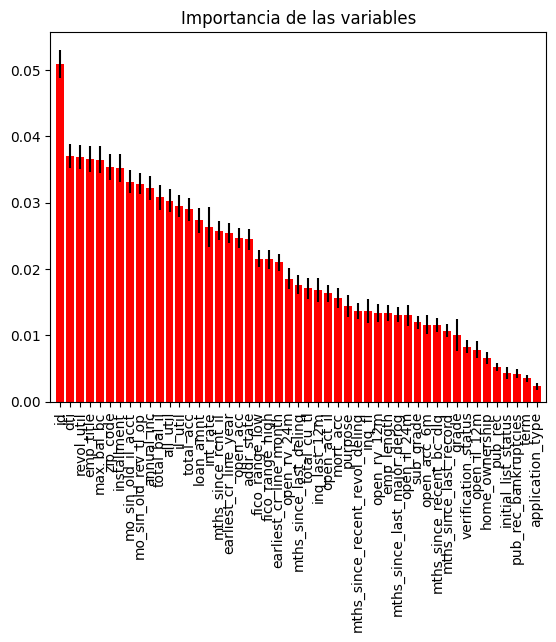

Importancia de las variables:
1. id (0.050943)
2. dti (0.037049)
3. revol_util (0.036948)
4. emp_title (0.036582)
5. max_bal_bc (0.036513)
6. zip_code (0.035420)
7. installment (0.035243)
8. mo_sin_old_il_acct (0.033151)
9. mo_sin_old_rev_tl_op (0.032863)
10. annual_inc (0.032211)
11. total_bal_il (0.030833)
12. all_util (0.030298)
13. il_util (0.029516)
14. total_acc (0.028990)
15. loan_amnt (0.027335)
16. int_rate (0.026282)
17. mths_since_rcnt_il (0.025815)
18. earliest_cr_line_year (0.025443)
19. open_acc (0.024726)
20. addr_state (0.024494)
21. fico_range_low (0.021597)
22. fico_range_high (0.021482)
23. earliest_cr_line_month (0.021037)
24. open_rv_24m (0.018559)
25. mths_since_last_delinq (0.017626)
26. total_cu_tl (0.017089)
27. inq_last_12m (0.016874)
28. open_act_il (0.016348)
29. mort_acc (0.015611)
30. purpose (0.014395)
31. mths_since_recent_revol_delinq (0.013719)
32. inq_fi (0.013693)
33. open_rv_12m (0.013403)
34. emp_length (0.013397)
35. mths_since_last_major_derog (0

In [ ]:
# Extraemos la importancia de cada variable
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Graficamos la importancia de cada variable en un gráfico de barras
plt.figure()
plt.title("Importancia de las variables")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Imprimimos una lista con la importancia de cada variable
print("Importancia de las variables:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))